# Data Analysis

In [16]:
import xlsxwriter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## fake data
data = {
    'borough':['The Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
    'land_area':[42.10, 70.82, 22.83, 108.53, 58.37]
}

df = pd.DataFrame(data)
df

,borough,land_area
0,The Bronx,42.10
1,Brooklyn,70.82
2,Manhattan,22.83
3,Queens,108.53
4,Staten Island,58.37


## Export to Excel - Simple
Few considerations
1. Set the pandas Excel-writing engine to xlsxwriter with ExcelWrite()
2. Convert the DAtaFrame into an xlsxwriter object with to_excel()
3. Create a workbook and worksheet objects for resulting output with writer.book and writer.sheets

### Convert dataframe to XlsxWriter Excel object

In [2]:
# Set pandas engine to xlsxwriter
writer = pd.ExcelWriter(r'../output/11_pandas_analysis_simple.xlsx')

type(writer)

pandas.io.excel._xlsxwriter.XlsxWriter

In [3]:
## Convert dataframe to an XlsxWriter Excel object
df.to_excel(writer, sheet_name = 'Sheet1')

In [4]:
# Get the xlsxwriter objects from the DAtaFrame writer object.
workbook = writer.book
worksheet = writer.sheets['Sheet1']

In [5]:
workbook.close()

## Export to Excel

In [48]:
np.random.random(5).round(2) *1000

array([740., 830., 140., 680., 950.])

### Manipulate dataframe

In [53]:
## Function to rename columns
def upcase_cols(column_name):
    return column_name.upper()


## Prepare data
nyc = (
    df
    .assign(                           ## Random column creation
        Location = 'NYC',
        Pct = np.random.random(5),
        Number = np.random.random(5).round(2) *1000
    )
    .rename(columns = upcase_cols)     ## Rename columns
    .sort_values(by = 'LAND_AREA')
)

nyc

,BOROUGH,LAND_AREA,LOCATION,PCT,NUMBER
2,Manhattan,22.83,NYC,0.603814,410.0
0,The Bronx,42.10,NYC,0.277116,310.0
4,Staten Island,58.37,NYC,0.156010,850.0
1,Brooklyn,70.82,NYC,0.984112,380.0
3,Queens,108.53,NYC,0.596404,50.0


### Export DataFrames to Excel

In [51]:
## Set pandas engine to xlsxwriter
writer = pd.ExcelWriter(r'../output/11_pandas_analysis.xlsx')


## Convert dataframe to an XlsxWriter Excel object
nyc.to_excel(writer, sheet_name = 'Sheet1', index = False)


# Get the xlsxwriter objects from the DataFrame writer object.
workbook = writer.book
worksheet = writer.sheets['Sheet1']


##
## Set up column formatting
##

## numeric format
pct_format = workbook.add_format({'num_format':'0.00%'})

## Format columns in worksheet
col_width = 20
worksheet.set_column('A:A', col_width)
worksheet.set_column('B:B', col_width)
worksheet.set_column('C:C', col_width)
worksheet.set_column('D:D', col_width, pct_format)


##
## Conditional formatting
##

## Color formats
green_format = workbook.add_format({'bg_color':'#C6EFCE', 
                                    'font_color':'#006100'})

red_format = workbook.add_format({'bg_color':'#FFC7CE'})

worksheet.conditional_format('B2:B11', 
                             {
                                'type':'cell',
                                'criteria':'greater than', 
                                'value':50, 
                                'format':green_format
                             }
                            )



##
## Find top n and bottom n in a range
##

## Top
worksheet.conditional_format('D2:D11', 
                             {
                                'type':'top',
                                'value':1, 
                                'format':green_format
                             }
                            )

## bottom
worksheet.conditional_format('D2:D11', 
                             {
                                'type':'bottom',
                                'value':1, 
                                'format':red_format
                             }
                            )


##
## Add data bar
##
worksheet.conditional_format('E2:E11', {'type':'data_bar'})


##
## Add color scale bar
##
worksheet.conditional_format('E2:E11', {'type':'3_color_scale'})


workbook.close()

### Export Visualizations to Excel

In [52]:
nyc

,BOROUGH,LAND_AREA,LOCATION,PCT,NUMBER
0,The Bronx,42.10,NYC,0.304382,580.0
1,Brooklyn,70.82,NYC,0.696741,300.0
2,Manhattan,22.83,NYC,0.936103,460.0
3,Queens,108.53,NYC,0.167389,240.0
4,Staten Island,58.37,NYC,0.711530,890.0


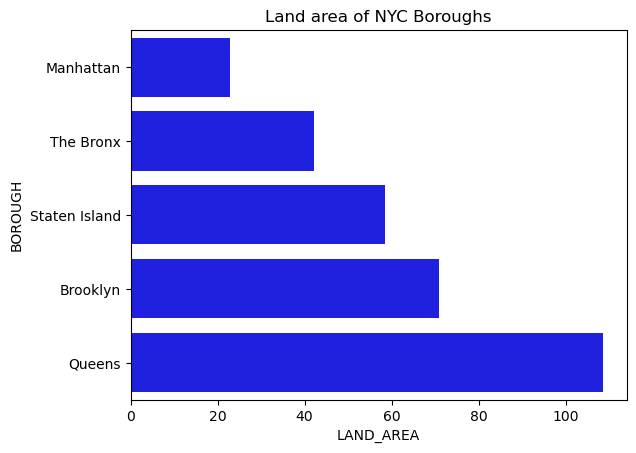

In [73]:
writer = pd.ExcelWriter('../output/12_visualizations_1.xlsx')
nyc.to_excel(writer, sheet_name = 'Sheet1', index = False)

workbook = writer.book
worksheet = writer.sheets['Sheet1']


##
## Add excel chart
##

## Add chart
nyc_chart = workbook.add_chart({'type':'bar'})

nyc_bar_data = {
    'name':'=Sheet1!$B$1',
    'categories':'=Sheet1!$A$2:$A$6',
    'values':'=Sheet1!$B$2:$B$6'
}
nyc_chart.add_series(nyc_bar_data)
nyc_chart.set_title({'name':'Land area of NYC Boroughs'})
nyc_chart.set_x_axis({'name':'Borough'})
nyc_chart.set_y_axis({'name':'Land area (square miles)'})

worksheet.insert_chart('A8', nyc_chart)



##
## Add python image
##

ax = sns.barplot(data = nyc, x='LAND_AREA', y='BOROUGH', color = 'blue', )
ax.set_title('Land area of NYC Boroughs')
plt.savefig('../output/nyc_land.png', bbox_inches='tight', dpi = (400))

worksheet.insert_image('A26', 'nyc_land.png')


workbook.close()

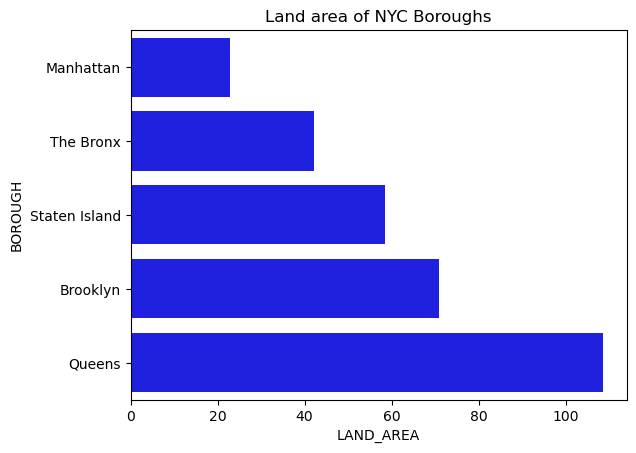